# Predicting heart disease using machine leaning

**This notebook looks into using various python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting wheather or not someone has heart disease based on their medical attributes**

Wre'r going to take following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem definition

In a statement,
> Given clinical parameters about a patient, can we predict wheather or not they have heart disease?

## 2. Data

> The original data come from Cleavland data from the UCI Machine learning repository.
> There is also a version of it available on kaggle.

## 3. Evaluation

> If we can reach 95% accuracy at predicting wheather or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

> This a where you'll get different information about each of the features in your data.

**Create a data dictionary**

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target 1 or 0

## Preparing the tools 

We'r goning to use pandas,numpy and Matplotlib for data analysis and manipulation.

In [1]:
# Import all the tools we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
# we want our plots to appear inside the notebook
%matplotlib inline  

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve

## Load the data

In [2]:
df = pd.read_csv('6.1 heart-disease.csv')
df.shape

(303, 14)

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Data exploration (exploratory data analysis or EDA)

The goal here is to find out more about he data and become a subject matter export on the dataset you're working with.

1. What questions are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do we deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add , change ,remove features to get more out of the data?

In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
# Let's find out how many of each class there
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

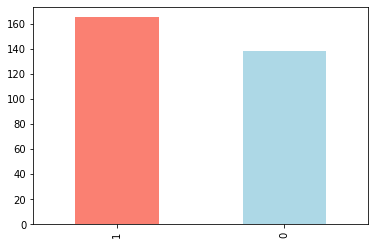

In [7]:
df['target'].value_counts().plot(kind='bar',color=['salmon','lightblue']);

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
# Are there any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Heart Disease Frequency according to sex

In [10]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
# Compare target cloumn with sex column

pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

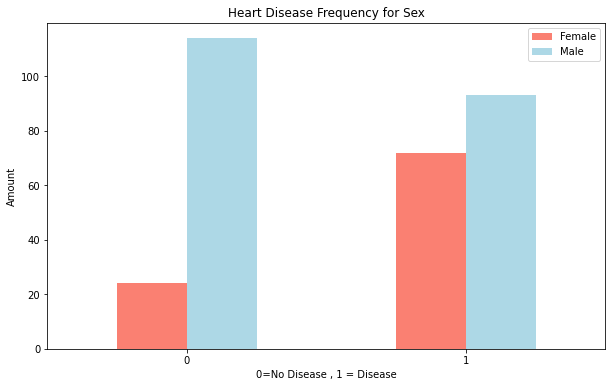

In [12]:
# Create a plot of crosstab
pd.crosstab(df.target,df.sex).plot(kind='bar',figsize=(10,6),color=['salmon','lightblue'])

plt.title('Heart Disease Frequency for Sex')
plt.xlabel('0=No Disease , 1 = Disease')
plt.ylabel('Amount')
plt.legend(['Female','Male'])
plt.xticks(rotation=0)

### Age vs Max Heart Rate for Heart Disease

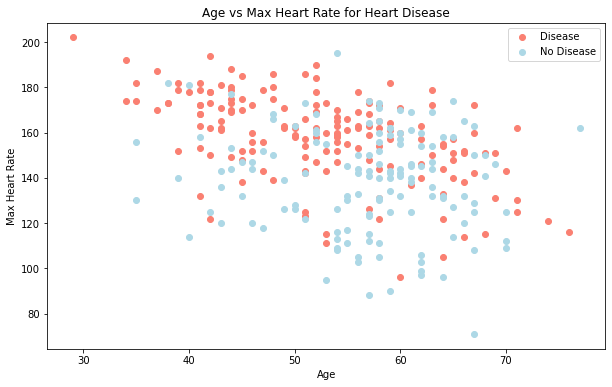

In [13]:
# Creating another figure
plt.figure(figsize=(10,6))

# Scatter with positive example
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c='salmon');

# Scatter with negative example
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c='lightblue');

# Add some helpful info
plt.title('Age vs Max Heart Rate for Heart Disease')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease','No Disease']);

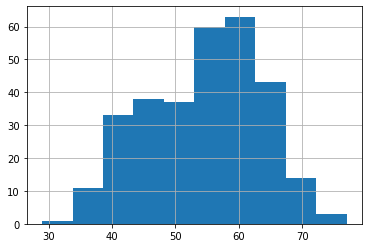

In [14]:
# Check the distribution of the age column with a histigram
df.age.hist();

### Heart Disease Frequency per chest pain type

In [15]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


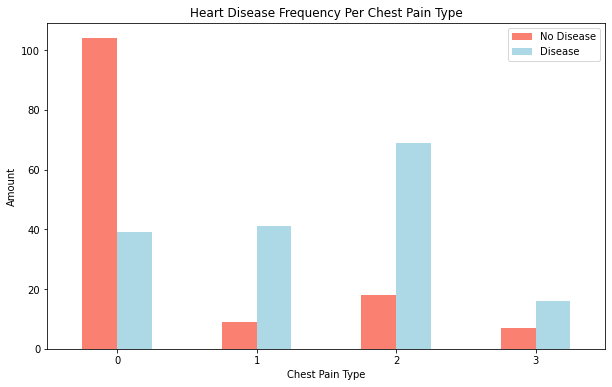

In [16]:
# Make the crosstab more visual
pd.crosstab(df.cp,df.target).plot(kind='bar',figsize=(10,6),color=['salmon','lightblue'])

# Add some communication
plt.title('Heart Disease Frequency Per Chest Pain Type')
plt.xlabel("Chest Pain Type")
plt.ylabel('Amount')
plt.legend(['No Disease','Disease'])
plt.xticks(rotation=0);

In [17]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


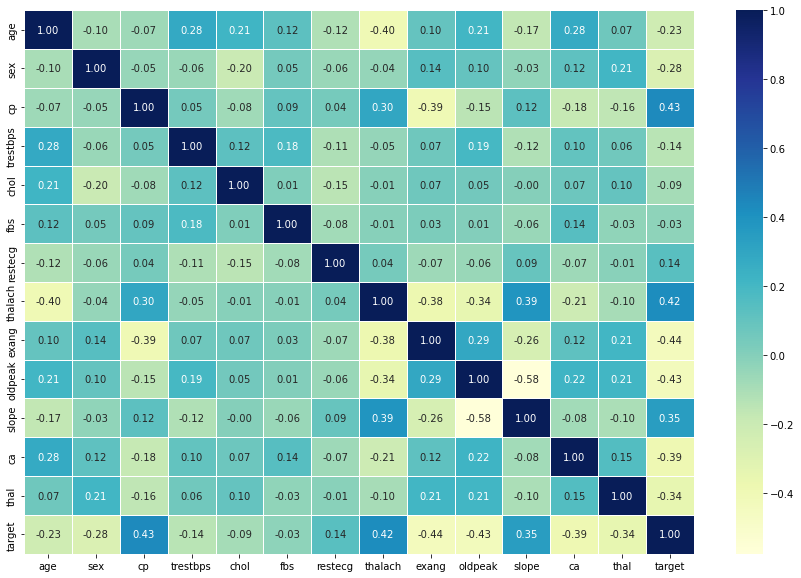

In [18]:
# Let's make our correlation matrix a littel prettier
corr_matrix = df.corr()

fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt='.2f',
                cmap='YlGnBu');

## 5. Modelling

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
# Split the data into x and y
x = df.drop('target',axis=1)
y = df['target']

In [21]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [22]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [23]:
# Split the data into train and test sets

np.random.seed(42)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)


In [24]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [25]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

**Now we've got our data split into traning and test sets, it's time to build a machine learning model**

**We'll train it(find the parttens) on the traning set.**

**And we'll test it(use the parttens) on the test set.**

We're going to try three machine learning models
1. Logistic Regression
2. K-nearest Neighbours Classifier
3. Random Forest Classifier

In [26]:
# Put the models in a dict
models = {'Logistic Regression':LogisticRegression(),
          'KNN':KNeighborsClassifier(),
          'Random Forest':RandomForestClassifier()}

# Create a function to fit and score a model
def fit_and_score(models,x_train,x_test,y_train,y_test):
    np.random.seed(42)
    # Make a dict to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the models to the data
        model.fit(x_train,y_train)
        # Evaluate the model and append ots score to model_scores
        model_scores[name] = model.score(x_test,y_test)
    return model_scores

In [27]:
np.random.seed(42)
model_scores = fit_and_score(models,
                             x_train,
                             x_test,
                             y_train,
                             y_test)

model_scores

C:\Users\gsaik\Desktop\ML_projects\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparison

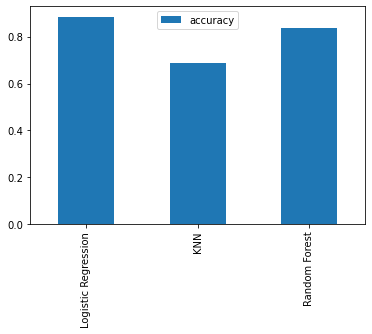

In [28]:
model_compare = pd.DataFrame(model_scores,index=['accuracy'])
model_compare.T.plot.bar();

Now we've got a baseline model ... and we know a model's first predictions aren't always what we should based our next step off.
what should we do?

Let's look at the following:
* Hyperparameter Tuning
* Feature importance
* Cross-validation
* Confusion matrix
* Preison,Recall,F1 scores
* Classification report
* ROC curve
* Area under the curve (AUC)

### Hyperparameter Tuning

In [29]:
# Let's tune KNN

train_score = []
test_score = []

# Create a list of different values for n_neighbors
neighbors = range(1,21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algoruthm
    knn.fit(x_train,y_train)
    
    # Update the traning scores list
    train_score.append(knn.score(x_train,y_train))
    
    # Update the test scores list
    test_score.append(knn.score(x_test,y_test))

In [30]:
train_score

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [31]:
test_score

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data:75.41%


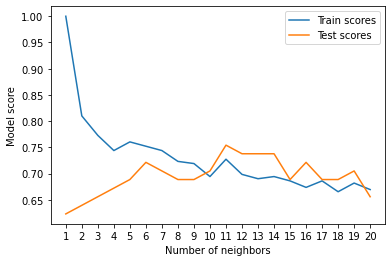

In [32]:
plt.plot(neighbors,train_score,label='Train scores')
plt.plot(neighbors,test_score,label='Test scores')
plt.xticks(np.arange(1,21,1)),
plt.xlabel('Number of neighbors')
plt.ylabel('Model score')
plt.legend();

print(f'Maximum KNN score on the test data:{max(test_score)*100:.2f}%')

## Hyperparameters Tuning with RandomizedSearchCV

We're going to tune:
* LogisticRegression 
* RandomForestClassifier


...using RandomizedSearchCV

In [33]:
# Create a hyperparameter grid for logisticRegression
log_reg_grid = {'C':np.logspace(-4,4,20),
                'solver':['liblinear']}

# Create a hypreparameter grid for RandomForestClassifier
rf_grid = {'n_estimators':np.arange(1,1000,50),
           'max_depth':[None,3,5,10],
           'min_samples_split':np.arange(2,20,2),
           'min_samples_leaf':np.arange(1,20,2)}

Now we've got hyperparameters frids setip for each of our models, let's tune them using RandomizedSearchCV...

In [34]:
# Tune Logistic Regression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,cv=5,
                               n_iter=20,
                               verbose=True)

# Fit random hyperparameter search for LogisticRegression
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [35]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [36]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

Now we've tuned LogisticRegression let's to the same for RandomForestClassifier

In [ ]:
# Setup the seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid,cv=5,
                               n_iter=20,
                               verbose=True)

# Fit random hyperparameter search for RandomForestClassifier
rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
rs_rf.best_params_

In [ ]:
rs_rf.score(x_test,y_test)

### Hyperparameters Tuning with GridSearchCV

Since our LogisticRegression model provides the best scores so far, we try to improve it even further by using GridSearchCV


In [ ]:
# Create a hyperparameter grid for logisticRegression
log_reg_grid = {'C':np.logspace(-4,4,30),
                'solver':['liblinear']}

# Tune Logistic Regression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),param_grid=log_reg_grid,cv=5,verbose=True)

# Fit our grid
gs_log_reg.fit(x_train,y_train)

In [ ]:
gs_log_reg.best_params_

In [ ]:
gs_log_reg.score(x_test,y_test)

## Evaluating our tuned machine learning classifier ,beyond accuracy

* ROC curve & AUC score
* Confusion matrix
* Classification report
* Preision
* Recall
* F1-score

To make comparisions and evaluate our trained model,first we need to make predictions

In [ ]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(x_test)

y_preds

In [ ]:
y_test

In [ ]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg,x_test,y_test);

In [ ]:
# Confusion matrix
print(confusion_matrix(y_test,y_preds))

In [ ]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')
plot_conf_mat(y_test,y_preds)

Now we've got ROC curve,AUC score and Confusion matrix,let's get a classification report as well as cross-validated preision , recall and f1-score

In [ ]:
print(classification_report(y_test,y_preds))

### Calculate evaluation metrics using cross-validation

we've going to calculate preision, recall, f1-score of our model using cross-validation and to do so we'll be using `cross_val_score`

In [ ]:
# Check best hyperprameters
gs_log_reg.best_params_

In [ ]:
# Crearte a new calssifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver='liblinear')

In [ ]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,x,y,cv=5,scoring='accuracy')
cv_acc = cv_acc.mean()
cv_acc

In [ ]:
# Cross-validated preision
cv_pre = cross_val_score(clf,x,y,cv=5,scoring='precision')
cv_pre = cv_pre.mean()
cv_pre

In [ ]:
# Cross-validated recall
cv_re = cross_val_score(clf,x,y,cv=5,scoring='recall')
cv_re = cv_re.mean()
cv_re

In [ ]:
# Cross-validated f1-score
cv_f1= cross_val_score(clf,x,y,cv=5,scoring='f1')
cv_f1 = cv_f1.mean()
cv_f1

In [ ]:
# Visualize cross-validated matrics
cv_metrics = pd.DataFrame({'Accuracy':cv_acc,
                           'Precision':cv_pre,
                           'Recall':cv_re,
                           'F1':cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title='Cross-validated classification metrics',
                      legend=False);

### Feature Importance

Features importance is another as asking "Which features contributed most to the outcome of the model and how didi they contribute?"

Findind feature importance is different for each machine learning model.

Let's find the featurs importance for our LogisticRegression model...

In [ ]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,
                         solver='liblinear')
clf.fit(x_train,y_train);

In [ ]:
clf.coef_

In [ ]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

In [ ]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title='Feature Importance',legend=False);